# HW3

# 問題1:

**1.Please do a simple EDA for the dataset.**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler  # standardize the Data
from sklearn.decomposition import PCA             # draw graph

import seaborn as sns

data=pd.read_csv('資料集.csv')
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004/3/10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004/3/10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004/3/10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004/3/10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004/3/10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005/4/4,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,2005/4/4,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,2005/4/4,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,2005/4/4,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


**-200為缺失值，故先將-200轉為NaN**

In [2]:
data=data.replace(-200,np.nan)
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004/3/10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004/3/10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004/3/10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004/3/10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004/3/10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005/4/4,10:00:00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2005/4/4,11:00:00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2005/4/4,12:00:00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2005/4/4,13:00:00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [3]:
data.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

**可發現CO(GT)、NMHC(GT)、NO2(GT)、NOx(GT)缺失值太多，故刪除**

In [4]:
coll=[0,2,4,7,9]
data=data.drop(data.columns[coll],axis=1)
data.isnull().sum()

Time               0
PT08.S1(CO)      366
C6H6(GT)         366
PT08.S2(NMHC)    366
PT08.S3(NOx)     366
PT08.S4(NO2)     366
PT08.S5(O3)      366
T                366
RH               366
AH               366
dtype: int64

**其餘欄位columns缺失值為300多筆，故直接將有缺失值列刪除**

In [5]:
data=data.dropna()
data.isnull().sum()

Time             0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

**資料處理:將日期除外為本次訓練集**

In [6]:
x=data[['PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)'
    ,'PT08.S5(O3)','T','RH','AH']]
print(x)
x_df=x.values
print(x_df)
x_df_df=pd.DataFrame(x_df,columns=['PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)'
    ,'PT08.S5(O3)','T','RH','AH'])
x_df_df

      PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  \
0          1360.0      11.9         1046.0        1056.0        1692.0   
1          1292.0       9.4          955.0        1174.0        1559.0   
2          1402.0       9.0          939.0        1140.0        1555.0   
3          1376.0       9.2          948.0        1092.0        1584.0   
4          1272.0       6.5          836.0        1205.0        1490.0   
...           ...       ...            ...           ...           ...   
9352       1314.0      13.5         1101.0         539.0        1374.0   
9353       1163.0      11.4         1027.0         604.0        1264.0   
9354       1142.0      12.4         1063.0         603.0        1241.0   
9355       1003.0       9.5          961.0         702.0        1041.0   
9356       1071.0      11.9         1047.0         654.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
0          1268.0  13.6  48.9  0.7578  
1           972.0  13.3  47.7  

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...
8986,1314.0,13.5,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568
8987,1163.0,11.4,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119
8988,1142.0,12.4,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406
8989,1003.0,9.5,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139


In [8]:
import matplotlib.pyplot as plt

In [ ]:
for i in x_df_df.columns[0:9]:
    plt.figure(figsize=(6,6))
    plt.subplot(1,1,1)
    sns.histploT(x=x_df_df[i],stat="count",color="red",bins=15,kde={'alpha':0.5})
    plt.show()

**將每個變數，繪製histgram**

**可看出個別資料皆正常，並無缺失值**

**處理日期資料(將小時按照時數分為4類(6小時為一類))**

In [10]:
y = data[['Time']]
y_df=y.values
y_df_df=pd.DataFrame(y_df,columns=['Time'])
print(y_df_df)
for i in range(len(y_df_df)):
    if y_df_df['Time'][i]=='18:00:00':
        y_df_df['Time'][i]=3
    elif y_df_df['Time'][i]=='19:00:00':
        y_df_df['Time'][i] = 3
    elif y_df_df['Time'][i]=='20:00:00':
        y_df_df['Time'][i] = 3
    elif y_df_df['Time'][i]=='21:00:00':
        y_df_df['Time'][i] = 3
    elif y_df_df['Time'][i]=='22:00:00':
        y_df_df['Time'][i] = 3
    elif y_df_df['Time'][i]=='23:00:00':
        y_df_df['Time'][i] = 3
    elif y_df_df['Time'][i]=='00:00:00':
        y_df_df['Time'][i] = 0
    elif y_df_df['Time'][i]=='01:00:00':
        y_df_df['Time'][i] = 0
    elif y_df_df['Time'][i]=='02:00:00':
        y_df_df['Time'][i] = 0
    elif y_df_df['Time'][i]=='03:00:00':
        y_df_df['Time'][i]= 0
    elif y_df_df['Time'][i]=='04:00:00':
        y_df_df['Time'][i] = 0
    elif y_df_df['Time'][i]=='05:00:00':
        y_df_df['Time'][i] = 0
    elif y_df_df['Time'][i]=='06:00:00':
        y_df_df['Time'][i] = 1
    elif y_df_df['Time'][i]=='07:00:00':
        y_df_df['Time'][i] = 1
    elif y_df_df['Time'][i]=='08:00:00':
        y_df_df['Time'][i] = 1
    elif y_df_df['Time'][i]=='09:00:00':
        y_df_df['Time'][i] = 1
    elif y_df_df['Time'][i]=='10:00:00':
        y_df_df['Time'][i] = 1
    elif y_df_df['Time'][i]=='11:00:00':
        y_df_df['Time'][i] = 1
    elif y_df_df['Time'][i]=='12:00:00':
        y_df_df['Time'][i] = 2
    elif y_df_df['Time'][i]=='13:00:00':
        y_df_df['Time'][i] = 2
    elif y_df_df['Time'][i]=='14:00:00':
        y_df_df['Time'][i] = 2
    elif y_df_df['Time'][i]=='15:00:00':
        y_df_df['Time'][i] = 2
    elif y_df_df['Time'][i]=='16:00:00':
        y_df_df['Time'][i] = 2
    else:
        y_df_df['Time'][i] = 2

y_df_df

          Time
0     18:00:00
1     19:00:00
2     20:00:00
3     21:00:00
4     22:00:00
...        ...
8986  10:00:00
8987  11:00:00
8988  12:00:00
8989  13:00:00
8990  14:00:00

[8991 rows x 1 columns]


,Time
0,3
1,3
2,3
3,3
4,3
...,...
8986,1
8987,1
8988,2
8989,2


**2.Do the principal components analysis with 2 components.**

**PCA處理(分為一二主成分)**

In [11]:
std_data=StandardScaler().fit_transform(x_df_df)
PCA2=PCA(n_components=2)
principalComponents = PCA2.fit_transform(std_data)
principal_df = pd.DataFrame(data = principalComponents
                          , columns = ['principal component 1', 'principal component 2'])
print(principal_df)
print(PCA2.explained_variance_ratio_)
final_df = pd.concat([principal_df, y_df_df], axis = 1)
final_df

      principal component 1  principal component 2
0                  0.762027               0.799058
1                 -0.275946               0.602894
2                  0.014237               0.986512
3                  0.218821               1.202437
4                 -0.660470               1.006304
...                     ...                    ...
8986               1.847381               0.482479
8987               0.680677              -0.160331
8988               0.570601              -0.484259
8989              -0.720320              -0.800159
8990              -0.111195              -0.732243

[8991 rows x 2 columns]
[0.57002093 0.21736615]


,principal component 1,principal component 2,Time
0,0.762027,0.799058,3
1,-0.275946,0.602894,3
2,0.014237,0.986512,3
3,0.218821,1.202437,3
4,-0.660470,1.006304,3
...,...,...,...
8986,1.847381,0.482479,1
8987,0.680677,-0.160331,1
8988,0.570601,-0.484259,2
8989,-0.720320,-0.800159,2


**3.According to the result of Q2, visualize it into 2D projection**

**繪圖(n=2)**

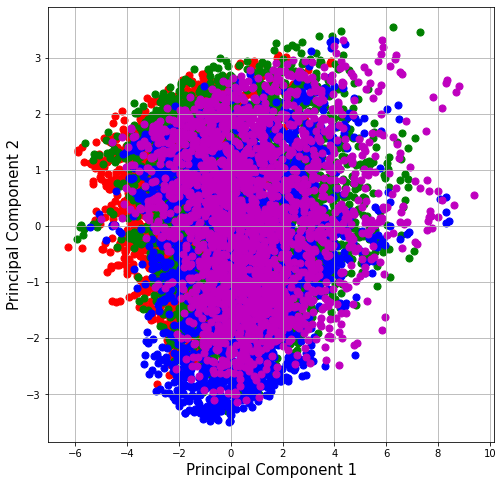

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets = [0,1,2,3]
colors = ['r', 'g', 'b','m']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['Time'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1'],
              final_df.loc[indicesToKeep, 'principal component 2'],
              c = color,
              s = 50)
ax.grid()
plt.show()

**4.Use scree plot to choose the number of principal components, and illustrate how you choose clearly.**

**畫Scree Plot**

[0.57002093 0.21736615 0.13453491 0.04188989 0.01322176 0.01096227
 0.00683668 0.00404732 0.00112008]


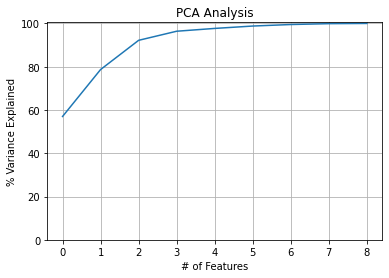

In [13]:
PCA9= PCA(n_components = 9)
PCA9.fit(std_data)
variance = PCA9.explained_variance_ratio_
print(variance)
var = np.cumsum(np.round(PCA9.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.style.context('seaborn-whitegrid')

plt.grid()
plt.plot(var)
plt.show()

**可看出降維至3的時後可解釋變異已達90%以上，故PCA分為三個主成分為最適合**

**5.According to the Q4, rebulid the model by the principal components you choose.**

In [14]:
PCA3=PCA(n_components=3)
principalComponents = PCA3.fit_transform(std_data)
principal_df = pd.DataFrame(data = principalComponents
                          , columns = ['principal component 1', 'principal component 2','principal component 3'])
print(principal_df)
PCA2.explained_variance_ratio_

      principal component 1  principal component 2  principal component 3
0                  0.762027               0.799058              -0.364620
1                 -0.275946               0.602894              -0.396183
2                  0.014237               0.986512              -0.074500
3                  0.218821               1.202437               0.245208
4                 -0.660470               1.006304               0.306421
...                     ...                    ...                    ...
8986               1.847381               0.482479              -1.591653
8987               0.680677              -0.160331              -1.843539
8988               0.570601              -0.484259              -2.238521
8989              -0.720320              -0.800159              -2.596176
8990              -0.111195              -0.732243              -2.685552

[8991 rows x 3 columns]


array([0.57002093, 0.21736615])

# 問題2:

**Analysis the data by hierarchical clustering. Explain how you choose the number of cluster and illustrate the answer clearly**

In [15]:
data=pd.read_csv('seeds_dataset.csv')
data

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,varieties
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [16]:
coll=[7]
data=data.drop(data.columns[coll],axis=1)
data_np=data.values
data_np

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

single


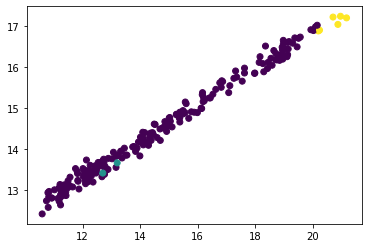

complete


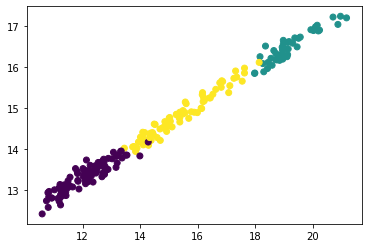

average


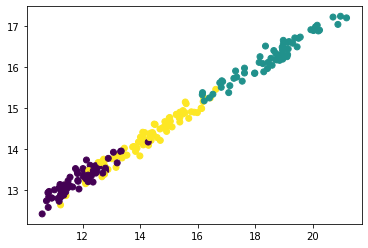

ward


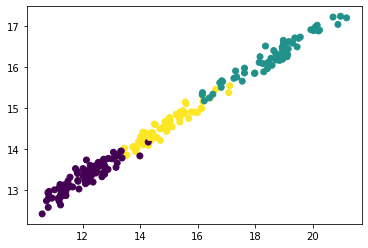

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
methods=['single', 'complete', 'average', 'ward']
for method in methods:
    hclust = AgglomerativeClustering(n_clusters=3,
                                     affinity='euclidean',
                                     linkage=method).fit(data_np)
    cluster_labels_hclust = hclust.labels_
    plt.scatter(data_np[:, 0], data_np[:, 1], c=cluster_labels_hclust)
    print(method)
    plt.show()

**由上圖可知，當linkage為complete時，分群效果較為準確，而single、average、wardz法則可觀察有許多分類重疊的情況發生，故使用completez法**

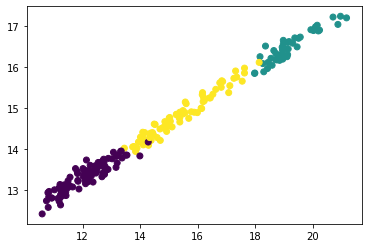

In [18]:
hclust = AgglomerativeClustering(n_clusters=3,
                                     affinity='euclidean',
                                     linkage='complete').fit(data_np)
cluster_labels_hclust = hclust.labels_
plt.scatter(data_np[:, 0], data_np[:, 1], c=cluster_labels_hclust)
plt.show()

2


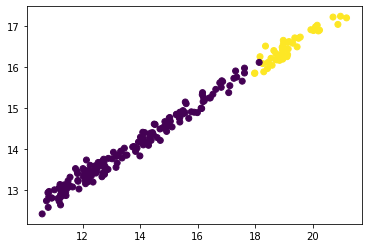

3


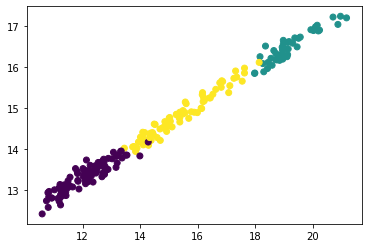

4


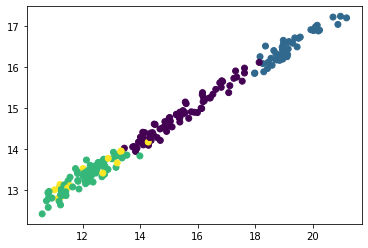

5


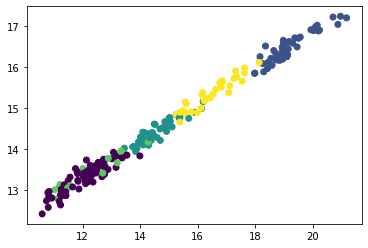

6


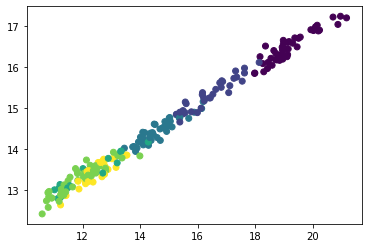

7


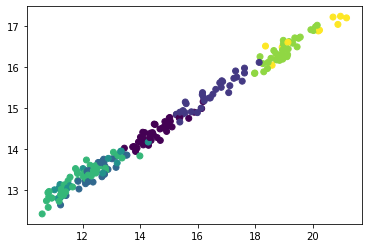

8


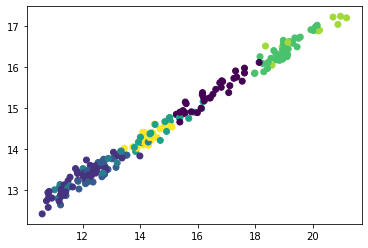

9


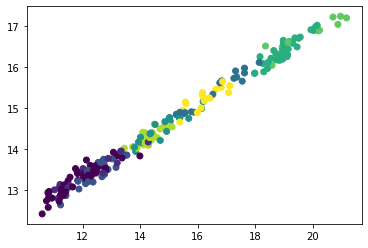

In [19]:
for i in range(2,10,1):
    hclust = AgglomerativeClustering(n_clusters=i,
                                     affinity='euclidean',
                                     linkage='complete').fit(data_np)
    cluster_labels_hclust = hclust.labels_
    plt.scatter(data_np[:, 0], data_np[:, 1], c=cluster_labels_hclust)
    print(i)
    plt.show()
    

**當cluster從2至9時，可發現cluster=4開始分群效果開始高度重疊並無法正確分類，故選擇cluster=3為最佳分類數，且linkage為complete**